In [ ]:
import torch
import kornia.augmentation as korniatfm
from fastai.vision.all import *
import random

In [ ]:
#Reproduce results from documentation
rng = torch.manual_seed(0)
inpu = torch.rand(1, 1, 5, 5)

In [ ]:
blur = korniatfm.RandomGaussianBlur((3, 3), (0.1, 2.0), p=1.0,same_on_batch=False)
blur(inpu)

tensor([[[[0.6699, 0.4645, 0.3193, 0.1741, 0.1955],
          [0.5422, 0.6657, 0.6261, 0.6527, 0.5195],
          [0.3826, 0.2638, 0.1902, 0.1620, 0.2141],
          [0.6329, 0.6732, 0.5634, 0.4037, 0.2049],
          [0.8307, 0.6753, 0.7147, 0.5768, 0.7097]]]])

In [ ]:
#Now set p = 0.5. 
blur = korniatfm.RandomGaussianBlur((3, 3), (0.1, 2.0), p=0.5,same_on_batch=False)

In [ ]:
#Running this cell a few times should gives some results slightly above 0.5 and some slightly below
def unique(x):
    "Found these results by inspection"
    if abs(x-12.027215957641602)<1e-8: return True #We got these two values by inspection
    elif abs(x-11.8836088180542)<1e-8: return False
    else: raise Exception('We didnt get one of the two expected values')

blur = korniatfm.RandomGaussianBlur((3, 3), (0.1, 2.0), p=0.5,same_on_batch=False)
S1=0
S2=0
for k in range(1000):
    
    tem = unique(blur(inpu).sum().item())
    if tem: S1+=1
    elif not tem: S2+=1
        
print(S1+S2)
print(S1/1000)
print(S2/1000)

1000
0.511
0.489


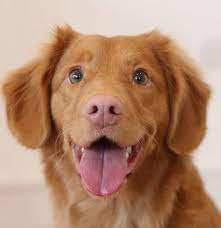

In [ ]:
#Ok, now let's apply to a real image:
img = PILImage.create("/Users/hamishhaggerty/Downloads/TEST_IMAGE.jpeg")
img

In [ ]:
#Let's experiment a bit. First, consider ToTensor():
ToTensor()(img)

TensorImage([[[225, 225, 225,  ..., 233, 233, 233],
              [225, 225, 225,  ..., 233, 233, 233],
              [225, 225, 225,  ..., 233, 233, 233],
              ...,
              [208, 208, 208,  ..., 155, 159, 161],
              [208, 208, 208,  ..., 155, 159, 161],
              [208, 208, 208,  ..., 155, 159, 161]],

             [[209, 209, 209,  ..., 227, 227, 227],
              [209, 209, 209,  ..., 227, 227, 227],
              [209, 209, 209,  ..., 227, 227, 227],
              ...,
              [189, 189, 189,  ...,  96, 100, 102],
              [189, 189, 189,  ...,  96, 100, 102],
              [189, 189, 189,  ...,  96, 100, 102]],

             [[196, 196, 196,  ..., 227, 227, 227],
              [196, 196, 196,  ..., 227, 227, 227],
              [196, 196, 196,  ..., 227, 227, 227],
              ...,
              [175, 175, 175,  ...,  54,  58,  58],
              [175, 175, 175,  ...,  54,  58,  58],
              [175, 175, 175,  ...,  54,  58,  58]]], d

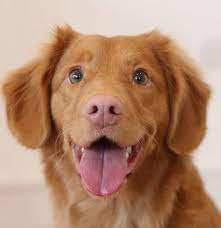

In [ ]:
#Now consider IntToFloatTensor
IntToFloatTensor()(img)

In [ ]:
#What type is it?
tem = IntToFloatTensor()(img)
type(tem)

fastai.vision.core.PILImage

In [ ]:
#Finally, consider the composition:
ToTensor()(IntToFloatTensor()(img))

TensorImage([[[225, 225, 225,  ..., 233, 233, 233],
              [225, 225, 225,  ..., 233, 233, 233],
              [225, 225, 225,  ..., 233, 233, 233],
              ...,
              [208, 208, 208,  ..., 155, 159, 161],
              [208, 208, 208,  ..., 155, 159, 161],
              [208, 208, 208,  ..., 155, 159, 161]],

             [[209, 209, 209,  ..., 227, 227, 227],
              [209, 209, 209,  ..., 227, 227, 227],
              [209, 209, 209,  ..., 227, 227, 227],
              ...,
              [189, 189, 189,  ...,  96, 100, 102],
              [189, 189, 189,  ...,  96, 100, 102],
              [189, 189, 189,  ...,  96, 100, 102]],

             [[196, 196, 196,  ..., 227, 227, 227],
              [196, 196, 196,  ..., 227, 227, 227],
              [196, 196, 196,  ..., 227, 227, 227],
              ...,
              [175, 175, 175,  ...,  54,  58,  58],
              [175, 175, 175,  ...,  54,  58,  58],
              [175, 175, 175,  ...,  54,  58,  58]]], d

In [ ]:
#Now let's take a look at Pipeline. Here is a simple example

def add_1(x):
    return x+1

def mult_zero(x):
    return 0*x

x=torch.rand(3,4)

pipe = Pipeline([add_1, mult_zero])
print(pipe(x)) 
input('add 1 and then mult by zero')

pipe = Pipeline([mult_zero,add_1])
print(pipe(x))
input('mult by zero and then add 1')



#One has to be careful with order of things in FastAI, as I have learned. This simple example does not nec mean
#the order is always left to right. 

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
add 1 and then mult by zero
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
mult by zero and then add 1


''

In [ ]:
#Simple test:
pipe = Pipeline([ToTensor(), IntToFloatTensor()])
t1 = Pipeline([ToTensor(), IntToFloatTensor()])(img)

t2 = IntToFloatTensor()(ToTensor()(img))

test_eq(t1,t2)

In [ ]:
#Order can be weird! Compare to next cell

blur = korniatfm.RandomGaussianBlur((3, 3), (0.1, 2.0), p=0.5,same_on_batch=False)
pipe = Pipeline([ToTensor(), IntToFloatTensor(),blur])

try:
    pipe(img)
    
except AttributeError:
    print('Got an AttributeError')

Got an AttributeError


In [ ]:
# So if Pipeline really worked left to right we would be ok
blur(IntToFloatTensor()(ToTensor()(img)))

TensorImage([[[[0.8824, 0.8824, 0.8824,  ..., 0.9137, 0.9137, 0.9137],
               [0.8824, 0.8824, 0.8824,  ..., 0.9137, 0.9137, 0.9137],
               [0.8824, 0.8824, 0.8824,  ..., 0.9137, 0.9137, 0.9137],
               ...,
               [0.8157, 0.8157, 0.8157,  ..., 0.6078, 0.6235, 0.6314],
               [0.8157, 0.8157, 0.8157,  ..., 0.6078, 0.6235, 0.6314],
               [0.8157, 0.8157, 0.8157,  ..., 0.6078, 0.6235, 0.6314]],

              [[0.8196, 0.8196, 0.8196,  ..., 0.8902, 0.8902, 0.8902],
               [0.8196, 0.8196, 0.8196,  ..., 0.8902, 0.8902, 0.8902],
               [0.8196, 0.8196, 0.8196,  ..., 0.8902, 0.8902, 0.8902],
               ...,
               [0.7412, 0.7412, 0.7412,  ..., 0.3765, 0.3922, 0.4000],
               [0.7412, 0.7412, 0.7412,  ..., 0.3765, 0.3922, 0.4000],
               [0.7412, 0.7412, 0.7412,  ..., 0.3765, 0.3922, 0.4000]],

              [[0.7686, 0.7686, 0.7686,  ..., 0.8902, 0.8902, 0.8902],
               [0.7686, 0.7686, 0

In [ ]:
#Recall that there is an internal order:
print(IntToFloatTensor().order)
print(ToTensor().order)
#print(blur.order) #throws an error. blur doesn't have order

10
5


In [ ]:
#If we do the following:
blur = korniatfm.RandomGaussianBlur((3, 3), (0.1, 2.0), p=0.5,same_on_batch=False)
blur.order = IntToFloatTensor().order + 1

#Now will run without issue!
pipe = Pipeline([ToTensor(), IntToFloatTensor(),blur])
pipe(img)

TensorImage([[[[0.8824, 0.8824, 0.8836,  ..., 0.9137, 0.9137, 0.9137],
               [0.8824, 0.8824, 0.8836,  ..., 0.9137, 0.9137, 0.9137],
               [0.8824, 0.8824, 0.8836,  ..., 0.9137, 0.9137, 0.9137],
               ...,
               [0.8157, 0.8157, 0.8157,  ..., 0.6066, 0.6210, 0.6264],
               [0.8157, 0.8157, 0.8157,  ..., 0.6066, 0.6210, 0.6264],
               [0.8157, 0.8157, 0.8157,  ..., 0.6066, 0.6210, 0.6264]],

              [[0.8196, 0.8196, 0.8209,  ..., 0.8902, 0.8902, 0.8902],
               [0.8196, 0.8196, 0.8209,  ..., 0.8902, 0.8902, 0.8902],
               [0.8196, 0.8196, 0.8209,  ..., 0.8902, 0.8902, 0.8902],
               ...,
               [0.7412, 0.7412, 0.7412,  ..., 0.3765, 0.3897, 0.3950],
               [0.7412, 0.7412, 0.7412,  ..., 0.3765, 0.3897, 0.3950],
               [0.7412, 0.7412, 0.7412,  ..., 0.3765, 0.3897, 0.3950]],

              [[0.7686, 0.7686, 0.7699,  ..., 0.8902, 0.8902, 0.8902],
               [0.7686, 0.7686, 0

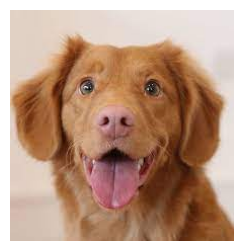

In [ ]:
#Now, let's display the image:
pipe = Pipeline([ToTensor(), IntToFloatTensor()])
t1 = pipe(img) #the image
show_images((img,))

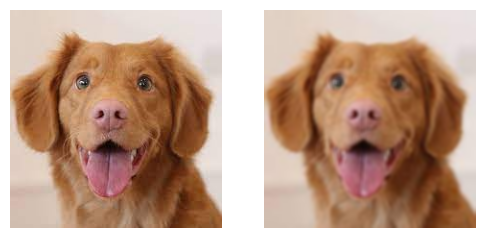

In [ ]:
#Now let's add some blur (with some probability). We can use the next cell to test the result.
blur = korniatfm.RandomGaussianBlur((5, 5), (2.0, 2.0), p=1.0,same_on_batch=False,keepdim=True)
blur.order = IntToFloatTensor().order + 1
pipe = Pipeline([ToTensor(), IntToFloatTensor(),blur])
t2 = pipe(img)
show_images((t1,t2))

In [ ]:
is_blurry=input('Input `yes` if right image looks blurry, else input `no`')

if is_blurry=='yes': 
    test_ne(t1,t2)
    print('We correctly said the image is blurry')

elif is_blurry=='no':
    test_eq(t1,t2)
    print('We correctly said the image is NOT blurry')
    
else: print('Please type either yes or no')


Input `yes` if right image looks blurry, else input `no`yes
We correctly said the image is blurry


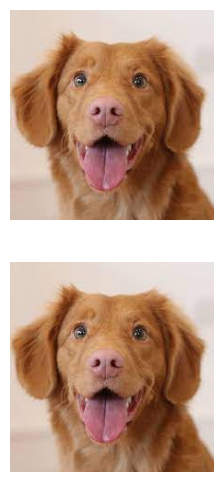

In [ ]:
#Now let's try doing the same but with batch
t1_rep = torch.stack((t1,t1))

blur = korniatfm.RandomGaussianBlur((11, 11), (10.0, 10.0), p=0.5,same_on_batch=False,keepdim=True)
blur.order = IntToFloatTensor().order + 1
pipe = Pipeline([blur])
t2_rep = pipe(t1_rep)

show_images(t2_rep,nrows=2)

In [ ]:
#Now let's check that korniatfm.RandomGaussianBlur gives correct probs when batched

#Running this cell a few times should gives some results slightly above 0.5 and some slightly below
def unique(x):
    "Found these results by inspection"
    if abs(x-84310.65625)<1e-8: return True #We got these two values by inspection
    elif abs(x-84312.953125)<1e-8: return False
    else: raise Exception('We didnt get one of the two expected values')

        
bs=1000
t1_bigrep=torch.stack(tuple(t1 for i in range(bs)))
s=10
s2 = int(s/4)*2+1
blur = korniatfm.RandomGaussianBlur((s2, s2), (s, s), p=0.5,same_on_batch=False,keepdim=True)
blur.order = IntToFloatTensor().order + 1
pipe = Pipeline([blur], split_idx = 0)
t2_bigrep = pipe(t1_bigrep)

S1=0
S2=0
for i in range(bs):
    
    tem = unique(t2_bigrep[i].sum().item())
    if tem: S1+=1
    elif not tem: S2+=1
        
print(S1+S2)
print(S1/bs)
print(S2/bs)

1000
0.507
0.493


In [ ]:
#Now let's copy paste RandomGaussianBlur from the source code of self_supervised library.
class RandomGaussianBlur(RandTransform):
    "Randomly apply gaussian blur with probability `p` with a value of s"
    order = 11
    def __init__(self, p=1.0,prob=0.5, s=(8,32), same_on_batch=False, **kwargs): 
        store_attr()
        super().__init__(p=p, **kwargs)
        
    def encodes(self, x:TensorImage):
        if isinstance(self.s, tuple): s = np.random.randint(*self.s)
        if isinstance(self.s, list):  s = np.random.randint(*self.s)
        if isinstance(self.s, int):   s = self.s
        s2 = int(s/4)*2+1

        tfm = korniatfm.RandomGaussianBlur((s2,s2),(s,s),same_on_batch=self.same_on_batch,p=self.prob,keepdim=True)
                                            #kernel #sigma
        
        return tfm(x)

In [ ]:
#RandTransform is applied (randomly) to the ENTIRE batch. 
class Prac_Transform(RandTransform):
    def __init__(self,p): 
        store_attr()
        super().__init__(p=p)

        
    def encodes(self,x:TensorImage):
        
        tfm = korniatfm.RandomGaussianBlur((s2,s2),(s,s),same_on_batch=False,p=0.5,keepdim=True)
        return tfm(x)


bs=100
t1_bigrep=torch.stack(tuple(t1 for i in range(bs)))

prac_transform = Prac_Transform(p=1.0)
pipe = Pipeline([prac_transform], split_idx = 0)
t2_bigrep = pipe(t1_bigrep)

S=0
for l in range(bs):
    
    
    if abs(t2_bigrep[i].sum().item() - 84312.953125)<1e-5:
        S+=1
    
    

print(S/bs)

In [ ]:
#Now let's check that RandomGaussianBlur gives correct probs when batched

#Running this cell a few times should gives some results slightly above 0.5 and some slightly below
def unique(x):
    "Found these results by inspection"
    if abs(x-84310.65625)<1e-8: return True #We got these two values by inspection
    elif abs(x-84312.953125)<1e-8: return False
    else: raise Exception('We didnt get one of the two expected values')

        
bs=1000
t1_bigrep=torch.stack(tuple(t1 for i in range(bs)))
s=10
s2 = int(s/4)*2+1
blur = RandomGaussianBlur(s=s,prob=0.5,same_on_batch=False)
#blur.order = IntToFloatTensor().order + 1
pipe = Pipeline([blur], split_idx = 0)
t2_bigrep = pipe(t1_bigrep)

S1=0
S2=0
for i in range(bs):
    
    tem = unique(t2_bigrep[i].sum().item())
    if tem: S1+=1
    elif not tem: S2+=1
        
print(S1+S2)
print(S1/bs)
print(S2/bs)

In [ ]:
#My edited version of RandTransform
class RandomGaussianBlur(RandTransform):
    "Randomly apply gaussian blur with probability `p` with a value of s"
    order = 11
    def __init__(self, p=1.0,prob=0.5, s=(8,32),s1=None, same_on_batch=False, **kwargs): 
        store_attr()
        super().__init__(p=p, **kwargs)

    def encodes(self, x:TensorImage):

        if isinstance(self.s, int):   s = (self.s,self.s)
        elif isinstance(self.s, tuple) or isinstance(self.s, list): s=self.s
     
        #Default for ImageNet from BYOL / BT papers
        if self.s1 is None:
            self.s1 = np.random.uniform(0.1,2)

        tfm = korniatfm.RandomGaussianBlur(kernel_size=s,sigma=(self.s1,self.s1),same_on_batch=self.same_on_batch,p=self.prob)
        return tfm(x)

In [ ]:
#Now let's check that RandomGaussianBlur gives correct probs when batched

#Running this cell a few times should gives some results slightly above 0.5 and some slightly below
def unique(x):
    "Found these results by inspection"
    if abs(x-84307.734375)<1e-8: return True #We got these two values by inspection
    elif abs(x-84312.953125)<1e-8: return False
    else: raise Exception('We didnt get one of the two expected values')

        
bs=1000
t1_bigrep=torch.stack(tuple(t1 for i in range(bs)))
s=11
s1 = 3
blur = RandomGaussianBlur(s=s,s1=s1,prob=0.5,same_on_batch=False)
#blur.order = IntToFloatTensor().order + 1
pipe = Pipeline([blur], split_idx = 0)
t2_bigrep = pipe(t1_bigrep)

S1=0
S2=0
for i in range(bs):
    
    tem = unique(t2_bigrep[i].sum().item())
    if tem: S1+=1
    elif not tem: S2+=1
        
print(S1+S2)
print(S1/bs)
print(S2/bs)

In [ ]:
#Now let's check on MNIST
import matplotlib
matplotlib.rc('image', cmap='Greys') 

device='cpu'
bs=50
path = untar_data(URLs.MNIST)
items = get_image_files(path/'training') #i.e. NOT testing!!!
items=items.shuffle()
items = items[0:200]
split = RandomSplitter(valid_pct=0.0)
tds = Datasets(items, [PILImageBW.create, [parent_label, Categorize()]], splits=split(items))
dls = tds.dataloaders(bs=bs,num_workers=0, after_item=[ToTensor(), IntToFloatTensor()], device=device)

x,y = dls.train.one_batch()

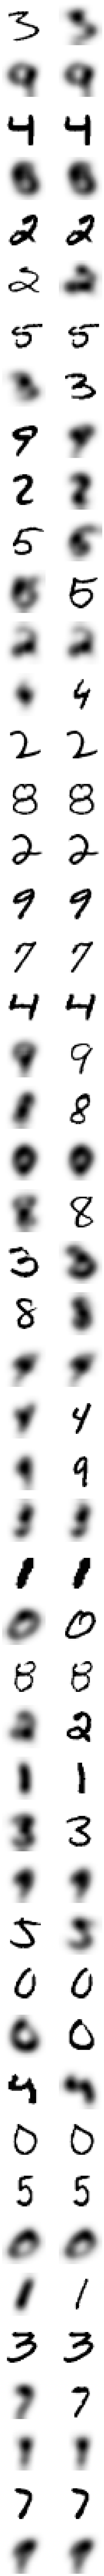

In [ ]:
blur = RandomGaussianBlur(s=11,s1=3,prob=0.5,same_on_batch=False) #Make sure which one it is (mine or original)
pipe = Pipeline([blur], split_idx = 0)
x1 = pipe(x)
x2 = pipe(x)
show_pair_batch(x1,x2)

In [ ]:
def show_pair_batch(x,x1):
    bs = x.shape[0]
    
    l1 = [x[i] for i in range(bs)]
    l2 = [x1[i] for i in range(bs)]
    result = [None]*(len(l1)+len(l2))
    result[::2] = l1
    result[1::2] = l2
    show_images(result,ncols=2,nrows=bs)

In [ ]:
show_pair_batch(x,x1)

In [ ]:
#Might make more sense to use "show batch"